Ok, let's set

- Cloud = 0
- Clear = 1

In [2]:
import numpy as np
import pylab as plt
import astroML.stats
from tqdm.notebook import tqdm
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['font.size'] = 12

  0%|          | 0/99999 [00:00<?, ?it/s]

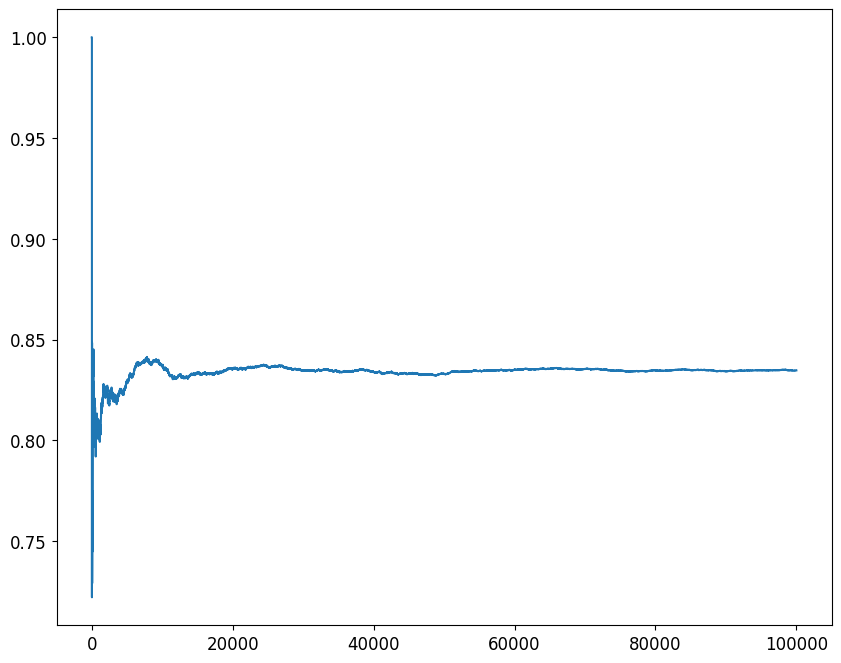

In [3]:
def markow():

    weather = [1] # Weather of the first day

    for ii in tqdm(range(1,100000)):
        # implementing forecasts based on probabilities
        if weather[ii-1] == 1:
            weather.append(np.random.choice(np.array([0, 1]), p=np.array([0.1, 0.9])))
        elif weather[ii-1] == 0:
            weather.append(np.random.choice(np.array([0, 1]), p=np.array([0.5, 0.5])))
        else:
            raise ValueError

    weather = np.array(weather)

    running_clear = np.cumsum(weather)/( np.arange(weather.shape[0])+1 )
    
    return running_clear

running_clear= markow()
plt.plot(running_clear);

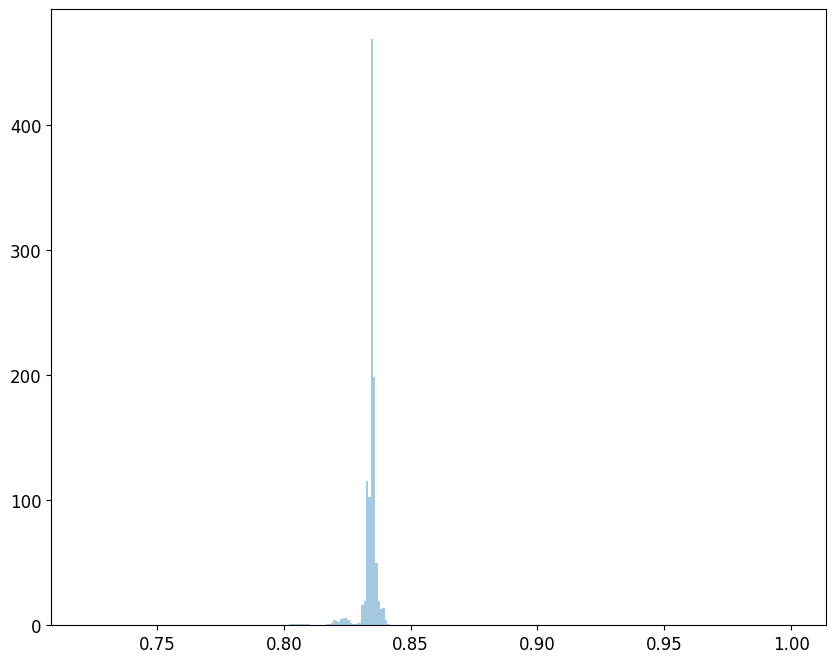

In [5]:
plt.hist(running_clear, bins=300, density=True, alpha=0.4);

In [18]:
print(np.median(running_clear))
print(astroML.stats.sigmaG(running_clear))
print(min(running_clear),max(running_clear))

0.8346459427172341
0.0019951515100456803
0.7272727272727273 1.0


Conservative burn-in: ~2000 samples

0.834733893557423
0.000831328998124405
0.8173387096774194 0.8414322250639387


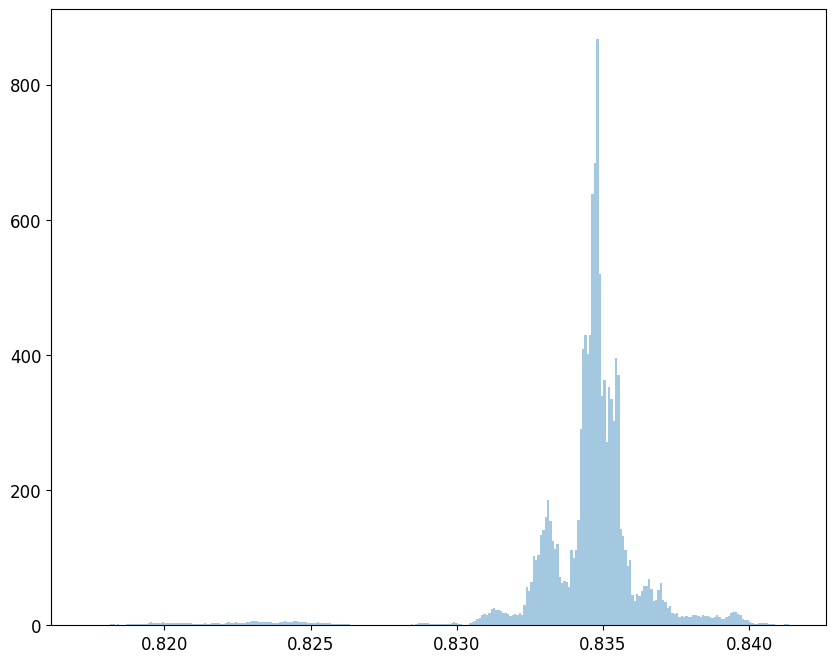

In [6]:
burnin_index=2000
running_burn = running_clear[burnin_index:]


plt.hist(running_burn, bins=300, density=True, alpha=0.4);
print(np.median(running_burn))
print(astroML.stats.sigmaG(running_burn))
print(min(running_burn),max(running_burn))

Indeed, those long tails are gone! 

Now just repeat a few times

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/99999 [00:00<?, ?it/s]

  0%|          | 0/99999 [00:00<?, ?it/s]

  0%|          | 0/99999 [00:00<?, ?it/s]

  0%|          | 0/99999 [00:00<?, ?it/s]

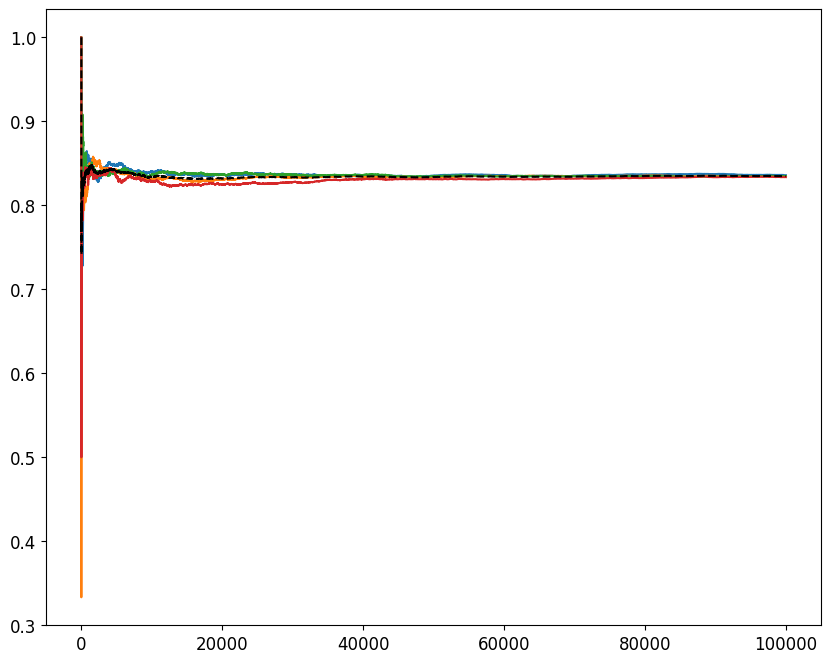

In [7]:
running_clear = np.array([markow() for realization in tqdm(range(4))])

for r in running_clear:
    plt.plot(r)
plt.plot(np.mean(running_clear,axis=0), c='black',ls='dashed');

Interesting how some memory persists even after O(10^4) samples! The mean is way more stable (indeed, MCMC samples combine many walkers).